In [74]:
import pandas as pd

In [75]:
air_quality = pd.read_csv('../data/air-quality-data.csv', decimal=',')
air_quality = air_quality.drop(['_id'], axis=1)

weather = pd.read_csv('../data/weather-data.csv', decimal=',')
weather = weather.drop(['_id'], axis=1)

In [76]:
# rename columns
air_quality = air_quality.rename(columns={'Ár': 'year', 'Efni': 'chemical', 'Fjöldi gilda':'value','Styrkur í (µg/ m3)': 'concentration', 'Fjöldi yfir': 'exceedence value'})
air_quality = air_quality.replace('-', float('nan'))
air_quality = air_quality.dropna()

air_quality

,year,chemical,value,concentration,exceedence value
0,1994,Niturdíoxíð NO2,11,75,3
1,1994,Kolmónoxíð CO,147,1,0
2,1994,Óson O3,171,27,0
3,1994,Brennisteinsdíoxíð SO2,173,5,0
4,1994,Svifryk PM10,173,26,1
...,...,...,...,...,...
131,2015,Brennisteinsvetni H2S,359,3,0
132,2016,Niturdíoxíð NO2,292,13,0
135,2016,Brennisteinsdíoxíð SO2,341,1,0
136,2016,Svifryk PM10,334,17,10


In [77]:
# drop chemical name
air_quality = air_quality.drop(['chemical'], axis=1)

# every 7th row
no2 = air_quality.iloc[::6] # NO2
co = air_quality.iloc[1::6] # CO
o3 = air_quality.iloc[2::6] # O3
so2 = air_quality.iloc[3::6] # SO2
pm10 = air_quality.iloc[4::6] # PM10
h2s = air_quality.iloc[5::6] # H2S

In [78]:
# rename headers
weather = weather.rename(columns={'Ár': 'year', 'Mánuður': 'month', 'Meðalhiti (°C)':'average temperature', 'Meðalhámarkshiti (°C)': 'average max temperature', 'Meðallágmarkshiti (°C)': 'average min temperature', 'Úrkoma (mm)': 'percipitation', 'Meðalvindhraði (m/s)': 'average wind speed', 'Sólskinsstundir (klst)':'hours sunshine'})
weather = weather.drop(['month'], axis=1)

In [79]:
weather

,year,average temperature,average max temperature,average min temperature,percipitation,average wind speed,hours sunshine
0,2001,1.0,3.4,-1.2,78.2,4.9,35.5
1,2001,-0.2,3.1,-3.0,80.8,5.7,91.8
2,2001,0.0,3.5,-2.8,24.4,3.7,126.0
3,2001,3.7,7.6,0.9,32.0,4.0,212.5
4,2001,6.6,9.8,4.5,87.1,4.2,130.6
...,...,...,...,...,...,...,...
203,2016,8.7,12.0,6.1,59.3,3.2,135.0
204,2016,7.8,10.0,5.8,206.9,5.8,40.3
205,2016,3.5,5.6,1.6,127.4,4.6,18.1
206,2016,3.6,6.0,1.3,146.7,5.4,3.2


In [85]:
# yearly average
weather = weather.groupby('year').mean()
weather = weather.reset_index()

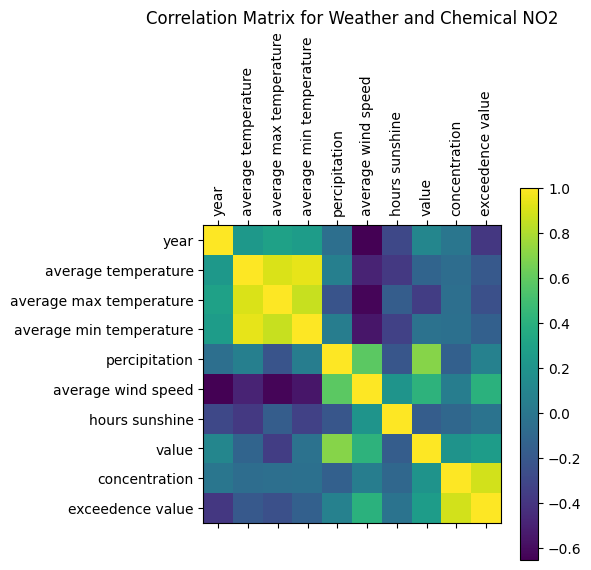

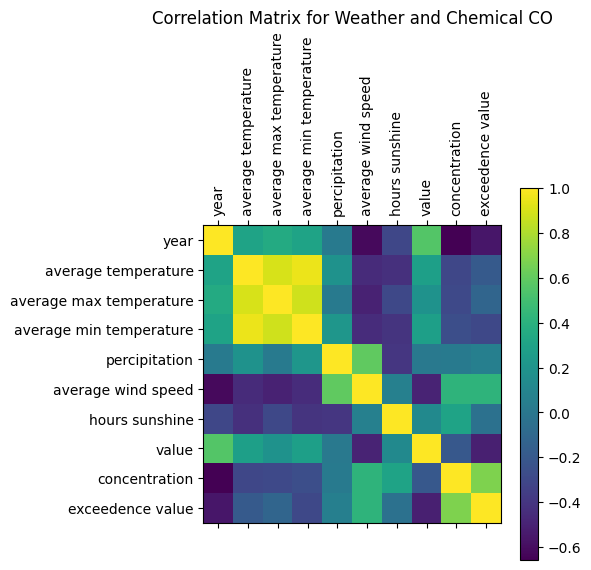

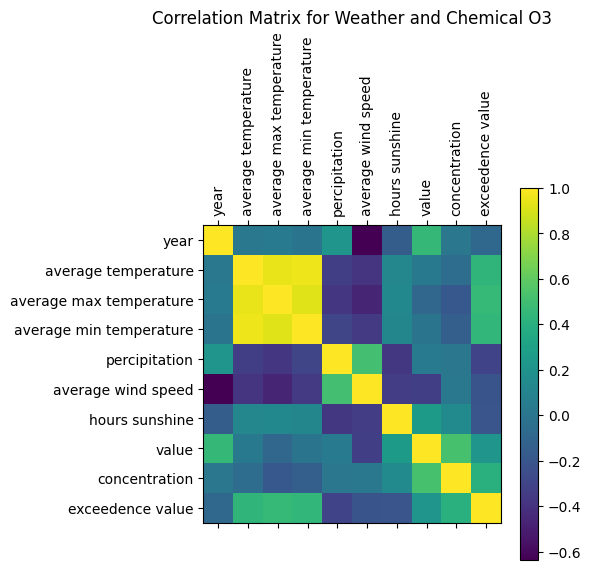

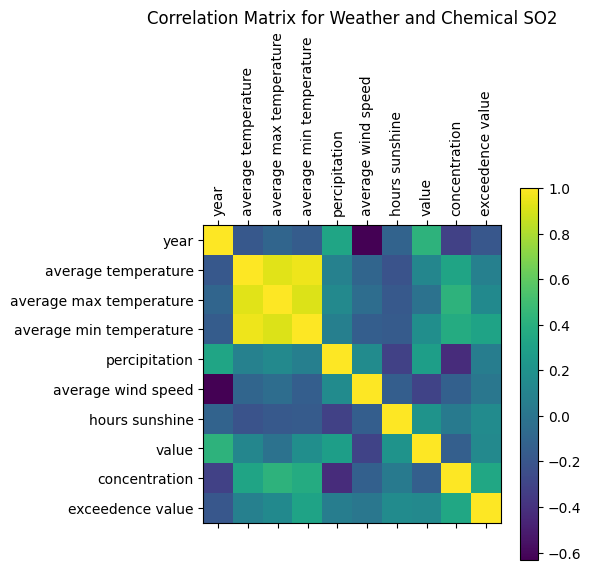

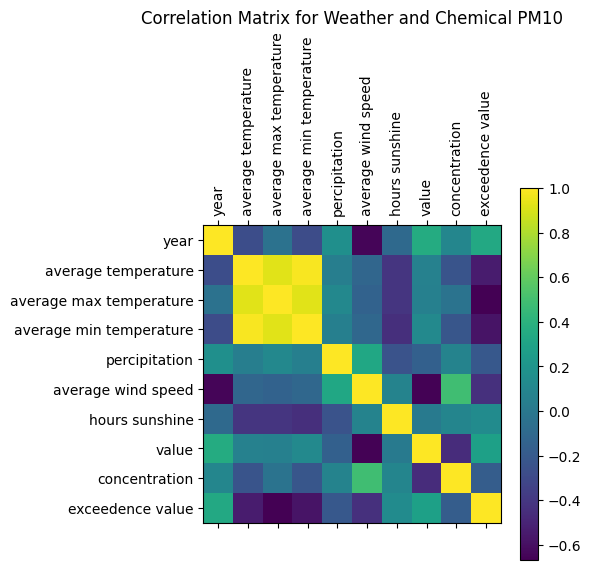

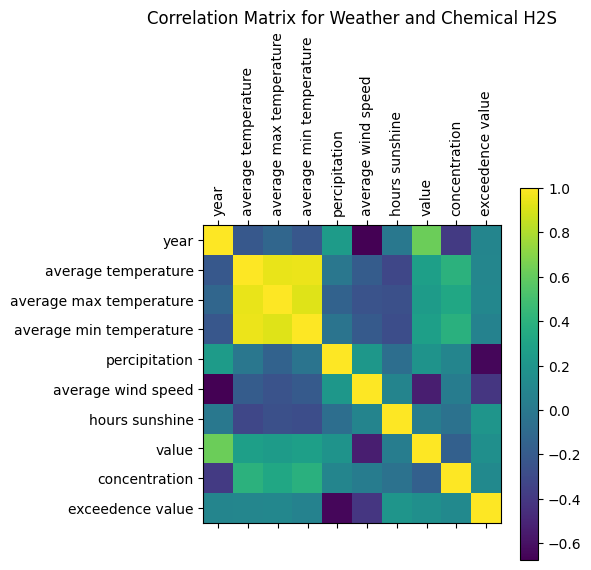

In [86]:
import pandas as pd
import matplotlib.pyplot as plt

# List of DataFrames for chemicals
chemicals = [no2, co, o3, so2, pm10, h2s]
chemical_name = ['NO2', 'CO', 'O3', 'SO2', 'PM10', 'H2S']

# Perform correlation analysis and visualization for each chemical
for i, df in enumerate(chemicals):
    # Merge weather and chemical DataFrame on 'year'
    weather_and_chemical = pd.merge(weather, df, on='year')
    
    # Calculate correlation matrix
    correlation_matrix = weather_and_chemical.corr()
    
    # Plot correlation matrix
    plt.matshow(correlation_matrix)
    plt.xticks(range(len(correlation_matrix.columns)), correlation_matrix.columns, rotation=90)
    plt.yticks(range(len(correlation_matrix.columns)), correlation_matrix.columns)
    plt.colorbar()
    plt.title(f"Correlation Matrix for Weather and Chemical {chemical_name[i]}")
    plt.show()
